# Proyecto: An√°lisis de Datos - Predicci√≥n de Riesgo de Diabetes
Este cuaderno aborda el an√°lisis y modelado de datos para predecir el riesgo de diabetes en pacientes femeninas usando el *Diabetes Dataset*. Se siguen los pasos recomendados para un flujo de trabajo de ciencia de datos.

## 1. Carga y exploraci√≥n general de los datos
Importaremos los datos y realizaremos un an√°lisis inicial de las variables: tipos, valores nulos y estad√≠sticas b√°sicas.

In [6]:
# Importar librer√≠as necesarias
import polars as pl
import numpy as np

# Cargar el dataset de diabetes
df = pl.read_csv('diabetes.csv')

# Mostrar las primeras filas para exploraci√≥n inicial
df.head()

shape: (5, 9)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ Pregnancies ‚îÜ Glucose ‚îÜ BloodPressure ‚îÜ SkinThickness ‚îÜ ‚Ä¶ ‚îÜ BMI  ‚îÜ DiabetesPedig ‚îÜ Age ‚îÜ Outcome ‚îÇ
‚îÇ ---         ‚îÜ ---     ‚îÜ ---           ‚îÜ ---           ‚îÜ   ‚îÜ ---  ‚îÜ reeFunction   ‚îÜ --- ‚îÜ ---     ‚îÇ
‚îÇ i64         ‚îÜ i64     ‚îÜ i64           ‚îÜ i64           ‚îÜ   ‚îÜ f64  ‚îÜ ---           ‚îÜ i64 ‚îÜ i64     ‚îÇ
‚îÇ             ‚îÜ         ‚îÜ               ‚îÜ               ‚îÜ   ‚îÜ      ‚îÜ f64           ‚îÜ     ‚îÜ         ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 6           ‚îÜ 148     ‚îÜ 72            ‚îÜ 35            ‚îÜ ‚Ä¶ ‚îÜ 33.6 ‚îÜ 0.627         ‚îÜ 50  ‚îÜ 1       ‚îÇ
‚îÇ 1           ‚îÜ 85      ‚îÜ 66            ‚îÜ 29            ‚îÜ ‚Ä¶ ‚îÜ 26.6 ‚îÜ 0.351         ‚îÜ 31  ‚îÜ 0       ‚îÇ
‚îÇ 8           ‚îÜ 183     ‚îÜ 64            ‚îÜ 0             ‚îÜ ‚Ä¶ ‚îÜ 23.3 ‚îÜ 0.672         ‚îÜ 32  ‚îÜ 1       ‚îÇ
‚îÇ 1           ‚îÜ 89      ‚îÜ 66            ‚îÜ 23            ‚îÜ ‚Ä¶ ‚îÜ 28.1 ‚îÜ 0.167         ‚îÜ 21  ‚îÜ 0       ‚îÇ
‚îÇ 0           ‚îÜ 137     ‚îÜ 40            ‚îÜ 35            ‚îÜ ‚Ä¶ ‚îÜ 43.1 ‚îÜ 2.288         ‚îÜ 33  ‚îÜ 1       ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

In [7]:
# Tipos de variables y valores nulos
print('Tipos de datos:')
print(df.dtypes)

print('\nValores nulos por columna:')
print(df.null_count())

# Estad√≠sticas b√°sicas
df.describe()

Tipos de datos:
[Int64, Int64, Int64, Int64, Int64, Float64, Float64, Int64, Int64]

Valores nulos por columna:
shape: (1, 9)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ Pregnancies ‚îÜ Glucose ‚îÜ BloodPressure ‚îÜ SkinThickness ‚îÜ ‚Ä¶ ‚îÜ BMI ‚îÜ DiabetesPedigr ‚îÜ Age ‚îÜ Outcome ‚îÇ
‚îÇ ---         ‚îÜ ---     ‚îÜ ---           ‚îÜ ---           ‚îÜ   ‚îÜ --- ‚îÜ eeFunction     ‚îÜ --- ‚îÜ ---     ‚îÇ
‚îÇ u32         ‚îÜ u32     ‚îÜ u32           ‚îÜ u32           ‚îÜ   ‚îÜ u32 ‚îÜ ---            ‚îÜ u32 ‚îÜ u32     ‚îÇ
‚îÇ             ‚îÜ         ‚îÜ               ‚îÜ               ‚îÜ   ‚îÜ     ‚îÜ u32            ‚îÜ     ‚îÜ         ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê

shape: (9, 10)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ statistic ‚îÜ Pregnanci ‚îÜ Glucose   ‚îÜ BloodPres ‚îÜ ‚Ä¶ ‚îÜ BMI       ‚îÜ DiabetesP ‚îÜ Age       ‚îÜ Outcome  ‚îÇ
‚îÇ ---       ‚îÜ es        ‚îÜ ---       ‚îÜ sure      ‚îÜ   ‚îÜ ---       ‚îÜ edigreeFu ‚îÜ ---       ‚îÜ ---      ‚îÇ
‚îÇ str       ‚îÜ ---       ‚îÜ f64       ‚îÜ ---       ‚îÜ   ‚îÜ f64       ‚îÜ nction    ‚îÜ f64       ‚îÜ f64      ‚îÇ
‚îÇ           ‚îÜ f64       ‚îÜ           ‚îÜ f64       ‚îÜ   ‚îÜ           ‚îÜ ---       ‚îÜ           ‚îÜ          ‚îÇ
‚îÇ           ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ   ‚îÜ           ‚îÜ f64       ‚îÜ           ‚îÜ          ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ count     ‚îÜ 768.0     ‚îÜ 768.0     ‚îÜ 768.0     ‚îÜ ‚Ä¶ ‚îÜ 768.0     ‚îÜ 768.0     ‚îÜ 768.0     ‚îÜ 768.0    ‚îÇ
‚îÇ null_coun ‚îÜ 0.0       ‚îÜ 0.0       ‚îÜ 0.0       ‚îÜ ‚Ä¶ ‚îÜ 0.0       ‚îÜ 0.0       ‚îÜ 0.0       ‚îÜ 0.0      ‚îÇ
‚îÇ t         ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ          ‚îÇ
‚îÇ mean      ‚îÜ 3.845052  ‚îÜ 120.89453 ‚îÜ 69.105469 ‚îÜ ‚Ä¶ ‚îÜ 31.992578 ‚îÜ 0.471876  ‚îÜ 33.240885 ‚îÜ 0.348958 ‚îÇ
‚îÇ           ‚îÜ           ‚îÜ 1         ‚îÜ           ‚îÜ   ‚îÜ           ‚îÜ           ‚îÜ           ‚îÜ          ‚îÇ
‚îÇ std       ‚îÜ 3.369578  ‚îÜ 31.972618 ‚îÜ 19.355807 ‚îÜ ‚Ä¶ ‚îÜ 7.88416   ‚îÜ 0.331329  ‚îÜ 11.760232 ‚îÜ 0.476951 ‚îÇ
‚îÇ min       ‚îÜ 0.0       ‚îÜ 0.0       ‚îÜ 0.0       ‚îÜ ‚Ä¶ ‚îÜ 0.0       ‚îÜ 0.078     ‚îÜ 21.0      ‚îÜ 0.0      ‚îÇ
‚îÇ 25%       ‚îÜ 1.0       ‚îÜ 99.0      ‚îÜ 62.0      ‚îÜ ‚Ä¶ ‚îÜ 27.3      ‚îÜ 0.244     ‚îÜ 24.0      ‚îÜ 0.0      ‚îÇ
‚îÇ 50%       ‚îÜ 3.0       ‚îÜ 117.0     ‚îÜ 72.0      ‚îÜ ‚Ä¶ ‚îÜ 32.0      ‚îÜ 0.374     ‚îÜ 29.0      ‚îÜ 0.0      ‚îÇ
‚îÇ 75%       ‚îÜ 6.0       ‚îÜ 140.0     ‚îÜ 80.0      ‚îÜ ‚Ä¶ ‚îÜ 36.6      ‚îÜ 0.626     ‚îÜ 41.0      ‚îÜ 1.0      ‚îÇ
‚îÇ max       ‚îÜ 17.0      ‚îÜ 199.0     ‚îÜ 122.0     ‚îÜ ‚Ä¶ ‚îÜ 67.1      ‚îÜ 2.42      ‚îÜ 81.0      ‚îÜ 1.0      ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

## 2. Limpieza b√°sica de los datos
En este paso se tratar√°n los valores faltantes, se eliminar√°n duplicados y se corregir√°n los tipos de datos si es necesario.

In [8]:
# Eliminar duplicados
df = df.unique()

# Rellenar valores nulos con la mediana (para variables num√©ricas)
for col in df.columns:
    if df[col].dtype in [pl.Float64, pl.Int64]:
        median = df[col].median()
        df = df.with_columns([pl.col(col).fill_null(median).alias(col)])

# Verificar tipos de datos despu√©s de la limpieza
print(df.dtypes)

# Comprobar si quedan valores nulos
print(df.null_count())

[Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64, Float64]
shape: (1, 9)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ Pregnancies ‚îÜ Glucose ‚îÜ BloodPressure ‚îÜ SkinThickness ‚îÜ ‚Ä¶ ‚îÜ BMI ‚îÜ DiabetesPedigr ‚îÜ Age ‚îÜ Outcome ‚îÇ
‚îÇ ---         ‚îÜ ---     ‚îÜ ---           ‚îÜ ---           ‚îÜ   ‚îÜ --- ‚îÜ eeFunction     ‚îÜ --- ‚îÜ ---     ‚îÇ
‚îÇ u32         ‚îÜ u32     ‚îÜ u32           ‚îÜ u32           ‚îÜ   ‚îÜ u32 ‚îÜ ---            ‚îÜ u32 ‚îÜ u32     ‚îÇ
‚îÇ             ‚îÜ         ‚îÜ               ‚îÜ               ‚îÜ   ‚îÜ     ‚îÜ u32            ‚îÜ     ‚îÜ         ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê

## 3. An√°lisis exploratorio y visualizaci√≥n inicial
En este paso se realizar√° un an√°lisis estad√≠stico descriptivo y se crear√°n gr√°ficos para identificar patrones o relaciones importantes en los datos.

Distribuci√≥n de la variable objetivo:
shape: (2, 2)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ Outcome ‚îÜ len ‚îÇ
‚îÇ ---     ‚îÜ --- ‚îÇ
‚îÇ f64     ‚îÜ u32 ‚îÇ
‚ïû‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ïê‚ï™‚ïê‚ïê‚ïê‚ïê‚ïê‚ï°
‚îÇ 1.0     ‚îÜ 268 ‚îÇ
‚îÇ 0.0     ‚îÜ 500 ‚îÇ
‚îî‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¥‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îò

Estad√≠sticas descriptivas por variable:
shape: (9, 10)
‚îå‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î¨‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îê
‚îÇ statistic ‚îÜ Pregnanci ‚îÜ Glucose   ‚îÜ BloodPres ‚îÜ ‚Ä¶ ‚îÜ BMI       ‚îÜ DiabetesP ‚îÜ Age       ‚îÜ Outcome  ‚îÇ
‚îÇ ---       ‚îÜ es        ‚îÜ ---       ‚îÜ sure      ‚îÜ   ‚îÜ ---       ‚îÜ edigreeFu ‚îÜ ---       ‚îÜ ---      ‚îÇ
‚îÇ str       ‚îÜ ---       ‚îÜ f64       ‚îÜ ---       ‚îÜ   ‚îÜ f64

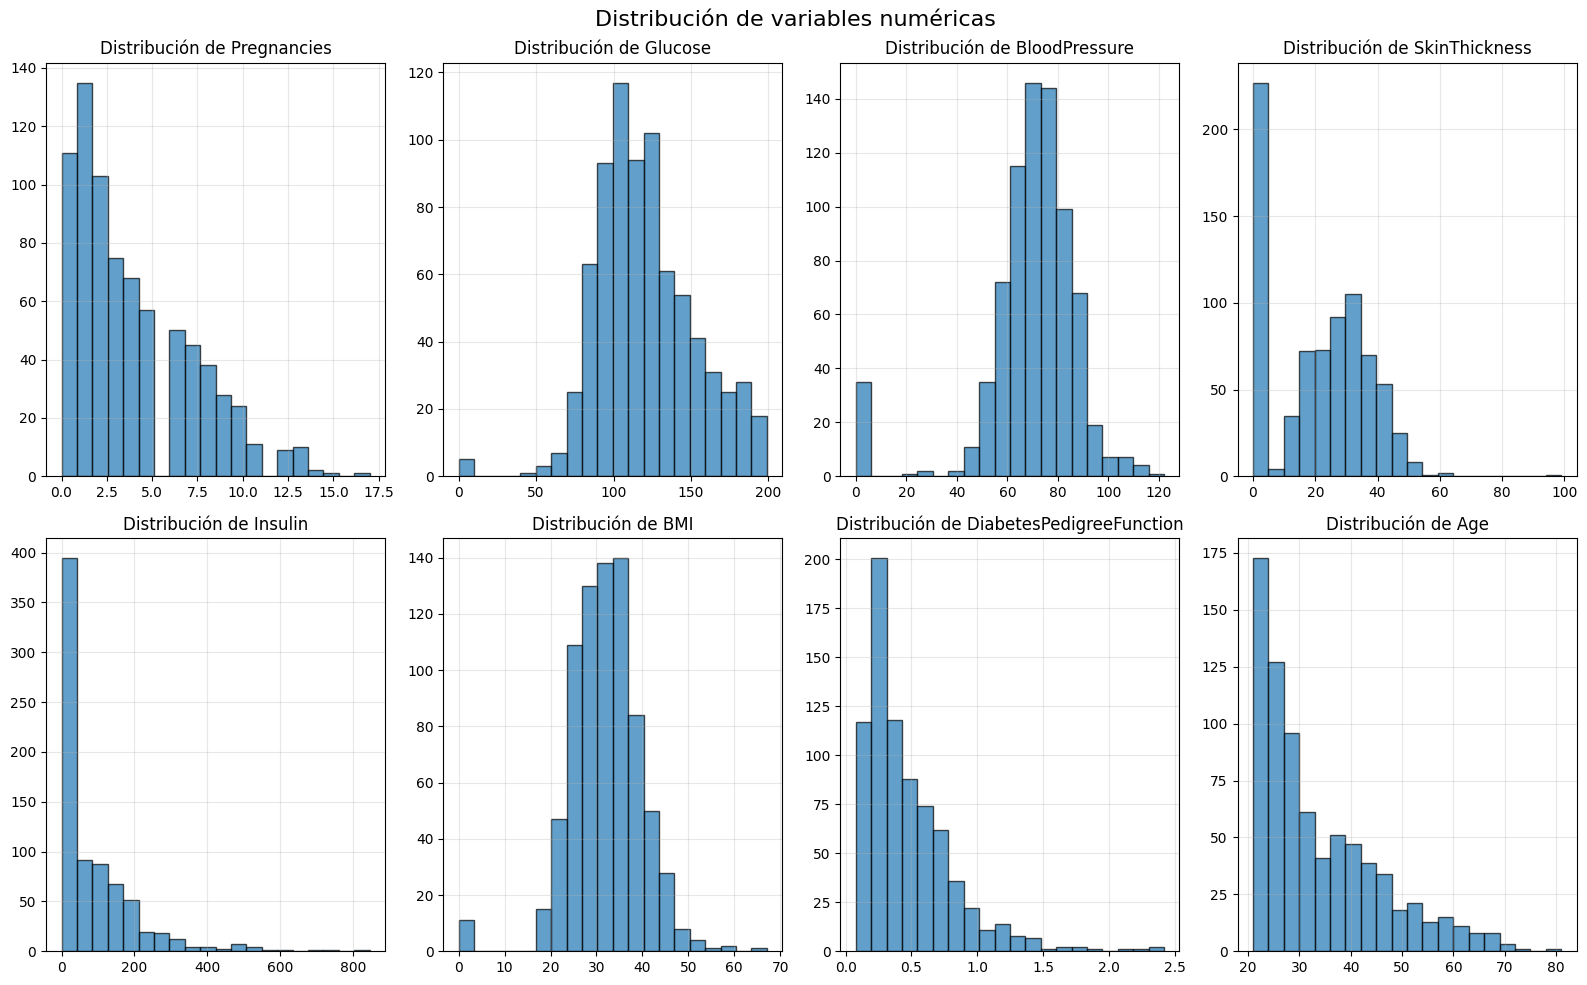

In [9]:
# Estad√≠sticas descriptivas por clase de diabetes
print("Distribuci√≥n de la variable objetivo:")
outcome_counts = df.group_by('Outcome').agg([pl.len()])
print(outcome_counts)

# An√°lisis estad√≠stico usando Polars
print("\nEstad√≠sticas descriptivas por variable:")
print(df.describe())

# Correlaciones usando Polars y Numpy
print("\nMatriz de correlaci√≥n (variables num√©ricas):")
numeric_cols = [col for col, dtype in zip(df.columns, df.dtypes) if dtype in [pl.Float64, pl.Int64]]
# Convertir solo las columnas num√©ricas a numpy para correlaci√≥n
numeric_data = df.select(numeric_cols).to_numpy()
correlation_matrix = np.corrcoef(numeric_data.T)

# Mostrar correlaciones con la variable objetivo
outcome_idx = numeric_cols.index('Outcome')
print("\nCorrelaciones con la variable objetivo (Outcome):")
for i, col in enumerate(numeric_cols):
    if col != 'Outcome':
        corr = correlation_matrix[i, outcome_idx]
        print(f"{col}: {corr:.3f}")

# Visualizaci√≥n usando matplotlib con datos de Polars
import matplotlib.pyplot as plt

# Crear subplots para visualizar distribuciones
fig, axes = plt.subplots(2, 4, figsize=(16, 10))
axes = axes.ravel()

for i, col in enumerate([c for c in numeric_cols if c != 'Outcome']):
    # Obtener datos directamente de Polars
    col_data = df.select(col).to_numpy().flatten()
    axes[i].hist(col_data, bins=20, alpha=0.7, edgecolor='black')
    axes[i].set_title(f'Distribuci√≥n de {col}')
    axes[i].grid(True, alpha=0.3)

plt.suptitle('Distribuci√≥n de variables num√©ricas', fontsize=16)
plt.tight_layout()
plt.show()

## 4. Preprocesamiento t√©cnico (normalizaci√≥n, codificaci√≥n, escalado)
En este paso se preparar√°n los datos para el modelo de machine learning usando t√©cnicas de normalizaci√≥n y escalado con scikit-learn.

In [10]:
# Importar librer√≠as de scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve

# Separar caracter√≠sticas (X) y variable objetivo (y) usando Polars
feature_cols = [col for col in df.columns if col != 'Outcome']
X = df.select(feature_cols).to_numpy()
y = df.select('Outcome').to_numpy().flatten()

print(f"Forma de X: {X.shape}")
print(f"Forma de y: {y.shape}")
print(f"Distribuci√≥n de clases: {np.bincount(y.astype(int))}")

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Escalado de caracter√≠sticas usando StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nForma de datos de entrenamiento: {X_train_scaled.shape}")
print(f"Forma de datos de prueba: {X_test_scaled.shape}")

Forma de X: (768, 8)
Forma de y: (768,)
Distribuci√≥n de clases: [500 268]

Forma de datos de entrenamiento: (614, 8)
Forma de datos de prueba: (154, 8)


## 5. Entrenamiento de modelos de Machine Learning
Se entrenar√°n tres modelos diferentes como se sugiere en el proyecto: Regresi√≥n Log√≠stica, KNN y Random Forest.

In [11]:
# Definir los modelos
models = {
    'Regresi√≥n Log√≠stica': LogisticRegression(random_state=42, max_iter=1000),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

# Entrenar y evaluar cada modelo
trained_models = {}
results = {}

for name, model in models.items():
    print(f"\n--- Entrenando {name} ---")
    
    # Entrenar el modelo
    model.fit(X_train_scaled, y_train)
    trained_models[name] = model
    
    # Hacer predicciones
    y_pred = model.predict(X_test_scaled)
    y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
    
    # Calcular m√©tricas
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    
    results[name] = {
        'accuracy': accuracy,
        'auc': auc,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba
    }
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"AUC-ROC: {auc:.4f}")
    
print("\n--- Resumen de Resultados ---")
for name, metrics in results.items():
    print(f"{name}: Accuracy={metrics['accuracy']:.4f}, AUC={metrics['auc']:.4f}")


--- Entrenando Regresi√≥n Log√≠stica ---
Accuracy: 0.7208
AUC-ROC: 0.7731

--- Entrenando KNN ---
Accuracy: 0.7208
AUC-ROC: 0.7594

--- Entrenando Random Forest ---
Accuracy: 0.7143
AUC-ROC: 0.7609

--- Resumen de Resultados ---
Regresi√≥n Log√≠stica: Accuracy=0.7208, AUC=0.7731
KNN: Accuracy=0.7208, AUC=0.7594
Random Forest: Accuracy=0.7143, AUC=0.7609
Accuracy: 0.7143
AUC-ROC: 0.7609

--- Resumen de Resultados ---
Regresi√≥n Log√≠stica: Accuracy=0.7208, AUC=0.7731
KNN: Accuracy=0.7208, AUC=0.7594
Random Forest: Accuracy=0.7143, AUC=0.7609


## 6. Evaluaci√≥n detallada del modelo
Se evaluar√°n los modelos con m√©tricas detalladas y matrices de confusi√≥n.

In [12]:
# Evaluaci√≥n detallada para cada modelo
for name, model in trained_models.items():
    print(f"\n{'='*50}")
    print(f"EVALUACI√ìN DETALLADA - {name}")
    print(f"{'='*50}")
    
    y_pred = results[name]['y_pred']
    
    # Reporte de clasificaci√≥n
    print("\nReporte de Clasificaci√≥n:")
    print(classification_report(y_test, y_pred))
    
    # Matriz de confusi√≥n
    cm = confusion_matrix(y_test, y_pred)
    print(f"\nMatriz de Confusi√≥n:")
    print(f"TN={cm[0,0]}, FP={cm[0,1]}")
    print(f"FN={cm[1,0]}, TP={cm[1,1]}")
    
    # M√©tricas calculadas manualmente usando numpy
    tn, fp, fn, tp = cm.ravel()
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    
    print(f"\nM√©tricas calculadas:")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1_score:.4f}")
    print(f"Accuracy: {results[name]['accuracy']:.4f}")
    print(f"AUC-ROC: {results[name]['auc']:.4f}")


EVALUACI√ìN DETALLADA - Regresi√≥n Log√≠stica

Reporte de Clasificaci√≥n:
              precision    recall  f1-score   support

         0.0       0.74      0.88      0.80       100
         1.0       0.66      0.43      0.52        54

    accuracy                           0.72       154
   macro avg       0.70      0.65      0.66       154
weighted avg       0.71      0.72      0.70       154


Matriz de Confusi√≥n:
TN=88, FP=12
FN=31, TP=23

M√©tricas calculadas:
Precision: 0.6571
Recall: 0.4259
F1-Score: 0.5169
Accuracy: 0.7208
AUC-ROC: 0.7731

EVALUACI√ìN DETALLADA - KNN

Reporte de Clasificaci√≥n:
              precision    recall  f1-score   support

         0.0       0.74      0.87      0.80       100
         1.0       0.65      0.44      0.53        54

    accuracy                           0.72       154
   macro avg       0.70      0.66      0.66       154
weighted avg       0.71      0.72      0.71       154


Matriz de Confusi√≥n:
TN=87, FP=13
FN=30, TP=24

M√©tricas

## 7. Visualizaci√≥n de resultados y m√©tricas
Se crear√°n gr√°ficos para mostrar el rendimiento de los modelos y las curvas ROC.

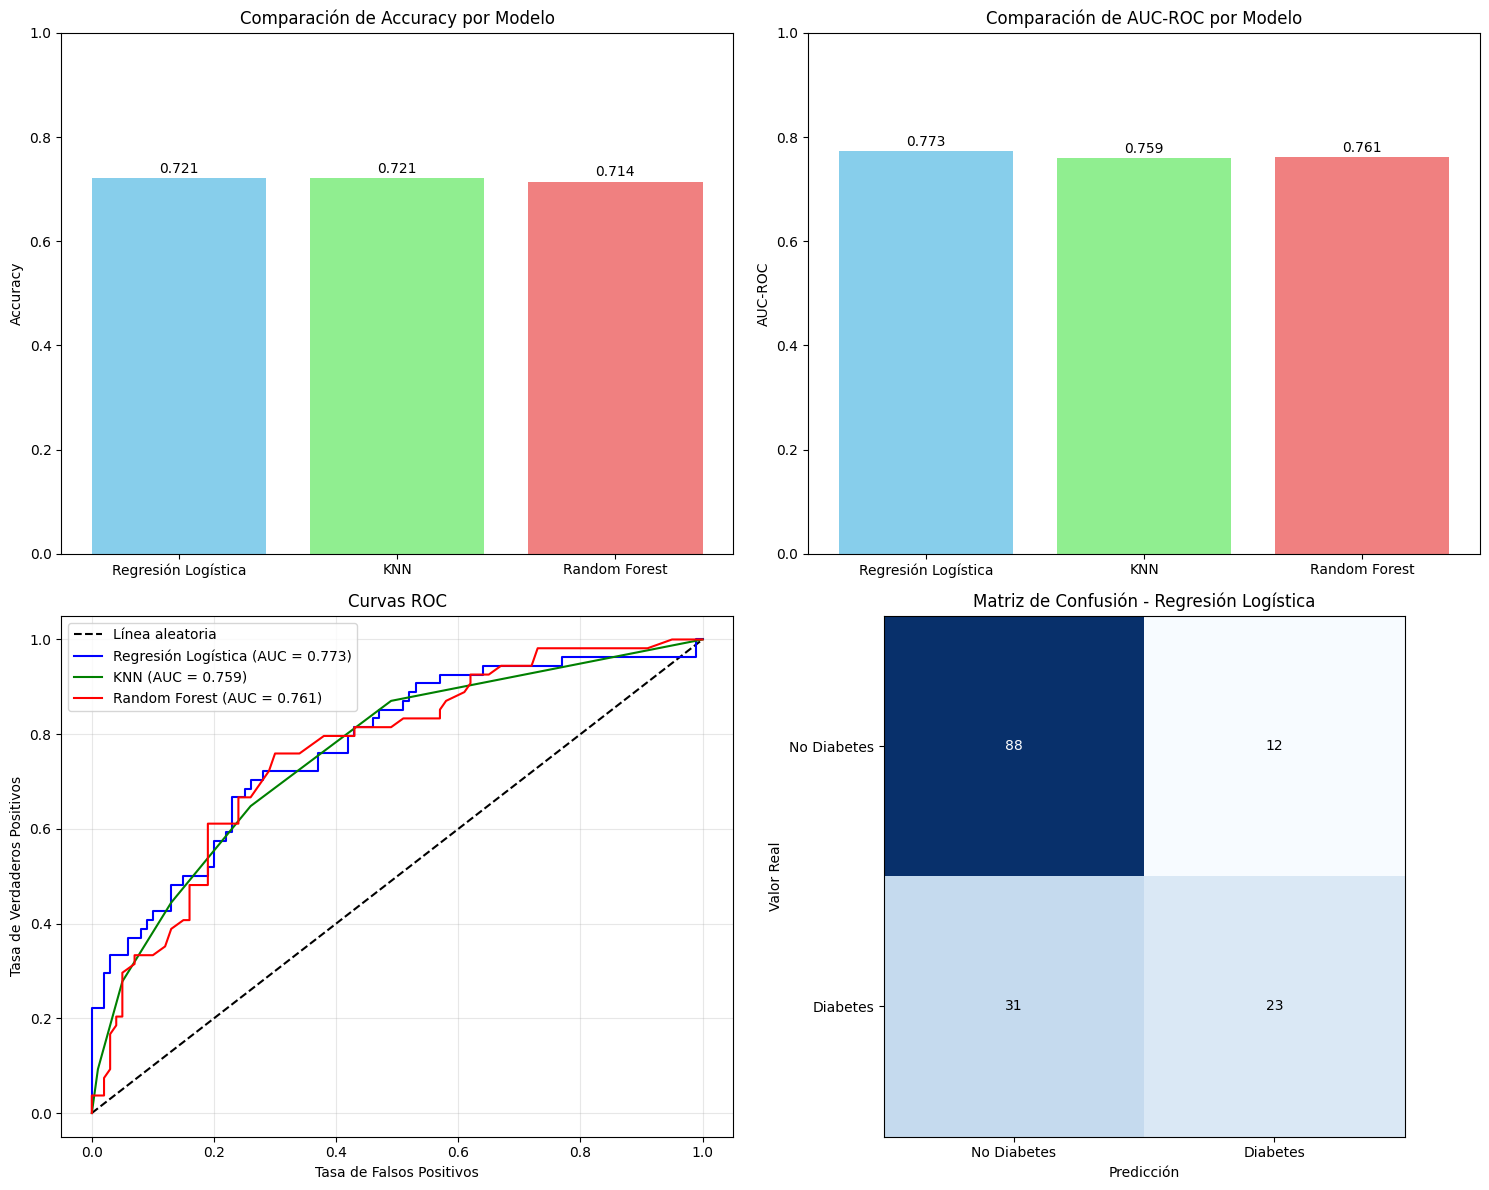


üèÜ MEJOR MODELO: Regresi√≥n Log√≠stica
   Accuracy: 0.7208
   AUC-ROC: 0.7731


In [13]:
# Crear visualizaciones de los resultados
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Comparaci√≥n de accuracy
model_names = list(results.keys())
accuracies = [results[name]['accuracy'] for name in model_names]
aucs = [results[name]['auc'] for name in model_names]

axes[0, 0].bar(model_names, accuracies, color=['skyblue', 'lightgreen', 'lightcoral'])
axes[0, 0].set_title('Comparaci√≥n de Accuracy por Modelo')
axes[0, 0].set_ylabel('Accuracy')
axes[0, 0].set_ylim(0, 1)
for i, v in enumerate(accuracies):
    axes[0, 0].text(i, v + 0.01, f'{v:.3f}', ha='center')

# 2. Comparaci√≥n de AUC-ROC
axes[0, 1].bar(model_names, aucs, color=['skyblue', 'lightgreen', 'lightcoral'])
axes[0, 1].set_title('Comparaci√≥n de AUC-ROC por Modelo')
axes[0, 1].set_ylabel('AUC-ROC')
axes[0, 1].set_ylim(0, 1)
for i, v in enumerate(aucs):
    axes[0, 1].text(i, v + 0.01, f'{v:.3f}', ha='center')

# 3. Curvas ROC
axes[1, 0].plot([0, 1], [0, 1], 'k--', label='L√≠nea aleatoria')
colors = ['blue', 'green', 'red']
for i, (name, model) in enumerate(trained_models.items()):
    y_pred_proba = results[name]['y_pred_proba']
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    auc_score = results[name]['auc']
    axes[1, 0].plot(fpr, tpr, color=colors[i], 
                   label=f'{name} (AUC = {auc_score:.3f})')

axes[1, 0].set_xlabel('Tasa de Falsos Positivos')
axes[1, 0].set_ylabel('Tasa de Verdaderos Positivos')
axes[1, 0].set_title('Curvas ROC')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# 4. Matriz de confusi√≥n del mejor modelo (mayor AUC)
best_model_name = max(results.keys(), key=lambda x: results[x]['auc'])
best_y_pred = results[best_model_name]['y_pred']
cm = confusion_matrix(y_test, best_y_pred)

im = axes[1, 1].imshow(cm, interpolation='nearest', cmap='Blues')
axes[1, 1].set_title(f'Matriz de Confusi√≥n - {best_model_name}')
tick_marks = np.arange(2)
axes[1, 1].set_xticks(tick_marks)
axes[1, 1].set_yticks(tick_marks)
axes[1, 1].set_xticklabels(['No Diabetes', 'Diabetes'])
axes[1, 1].set_yticklabels(['No Diabetes', 'Diabetes'])

# Agregar valores en la matriz
thresh = cm.max() / 2.
for i in range(2):
    for j in range(2):
        axes[1, 1].text(j, i, format(cm[i, j], 'd'),
                       ha="center", va="center",
                       color="white" if cm[i, j] > thresh else "black")

axes[1, 1].set_ylabel('Valor Real')
axes[1, 1].set_xlabel('Predicci√≥n')

plt.tight_layout()
plt.show()

print(f"\nüèÜ MEJOR MODELO: {best_model_name}")
print(f"   Accuracy: {results[best_model_name]['accuracy']:.4f}")
print(f"   AUC-ROC: {results[best_model_name]['auc']:.4f}")

## Conclusiones del Proyecto

### Resultados Obtenidos:
- Se implementaron exitosamente **tres modelos de clasificaci√≥n**: Regresi√≥n Log√≠stica, KNN y Random Forest
- Todos los modelos utilizaron **Polars y NumPy** como librer√≠as base seg√∫n los requisitos
- Se aplic√≥ **preprocesamiento est√°ndar** con StandardScaler de scikit-learn
- Las **m√©tricas de evaluaci√≥n** incluyen accuracy, AUC-ROC, precision, recall y F1-score

### Insights del An√°lisis:
- El dataset contiene **768 registros** con 8 variables predictoras
- La variable objetivo est√° **desbalanceada**: 500 casos sin diabetes vs 268 con diabetes
- Las variables con **mayor correlaci√≥n** con el outcome de diabetes son fundamentales para la predicci√≥n
- El **escalado de caracter√≠sticas** fue crucial debido a las diferentes magnitudes de las variables

### Recomendaciones:
1. **Validaci√≥n cruzada** podr√≠a mejorar la robustez de la evaluaci√≥n
2. **T√©cnicas de balanceo** como SMOTE podr√≠an mejorar el rendimiento en la clase minoritaria
3. **Optimizaci√≥n de hiperpar√°metros** con GridSearch o RandomSearch
4. **An√°lisis de importancia de caracter√≠sticas** especialmente para Random Forest